In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("/Users/kirinasirohi/Desktop/DATA 451/DATA 451/merged_groundtruth_secbysec.csv")
df.head()

,id,observation,date,date_time,activity_type,broad_activity_type,work_type,posture,sedentary_not,walking_not,activity_intensity,step
0,102,1,2019-07-24,2019-07-24 08:20:20,WRK- general,work_education,SP- Education and Health Services,stand,not_sedentary,not_walking,light,0
1,102,1,2019-07-24,2019-07-24 08:20:21,WRK- general,work_education,SP- Education and Health Services,stand,not_sedentary,not_walking,light,0
2,102,1,2019-07-24,2019-07-24 08:20:22,WRK- general,work_education,SP- Education and Health Services,stand,not_sedentary,not_walking,light,0
3,102,1,2019-07-24,2019-07-24 08:20:23,WRK- general,work_education,SP- Education and Health Services,stand,not_sedentary,not_walking,light,0
4,102,1,2019-07-24,2019-07-24 08:20:24,WRK- general,work_education,SP- Education and Health Services,stand,not_sedentary,not_walking,light,1


In [4]:
est_step = pd.read_csv("/Users/kirinasirohi/Desktop/DATA 451/DATA 451/estimated_steps.csv")
est_step.drop(columns=est_step.columns[0], axis=1, inplace=True)
est_step.sort_values("ID", inplace=True)
est_step['Estimated'] = est_step['Estimated'].astype(int)
est_step.head()

,ID,Session,Estimated
12,116,1,3495
11,116,2,579
24,117,1,5481
27,117,2,3072
7,122,1,340


In [5]:
actual = pd.DataFrame(df.groupby(['id', 'observation'])['step'].sum().reset_index())
actual = actual.rename(columns={'id': 'ID', 'observation': 'Session', 'step': 'Actual'})
actual.head()

,ID,Session,Actual
0,102,1,4081
1,102,2,3733
2,116,1,4506
3,116,2,459
4,117,1,5907


In [6]:
merged_df = pd.merge(est_step, actual, on=['ID', 'Session'])
merged_df

,ID,Session,Estimated,Actual
0,116,1,3495,4506
1,116,2,579,459
2,117,1,5481,5907
3,117,2,3072,3066
4,122,1,340,324
5,122,2,10619,10922
6,124,2,1763,1880
7,124,1,2281,2709
8,126,2,1315,1452
9,127,2,1583,1750


In [7]:
merged_df['Error'] = merged_df['Actual'] - merged_df['Estimated']
merged_df = merged_df[['ID', 'Session', 'Actual', 'Estimated', 'Error']]
merged_df['ID_Session'] = merged_df['ID'].astype(str) + ", " + merged_df['Session'].astype(str)
merged_df

/var/folders/b0/_np8ycmn60qgwzd37xn0y1bm0000gn/T/ipykernel_52192/820896700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['ID_Session'] = merged_df['ID'].astype(str) + ", " + merged_df['Session'].astype(str)


,ID,Session,Actual,Estimated,Error,ID_Session
0,116,1,4506,3495,1011,"116, 1"
1,116,2,459,579,-120,"116, 2"
2,117,1,5907,5481,426,"117, 1"
3,117,2,3066,3072,-6,"117, 2"
4,122,1,324,340,-16,"122, 1"
5,122,2,10922,10619,303,"122, 2"
6,124,2,1880,1763,117,"124, 2"
7,124,1,2709,2281,428,"124, 1"
8,126,2,1452,1315,137,"126, 2"
9,127,2,1750,1583,167,"127, 2"


In [8]:
merged_df['Squared Error'] = merged_df['Error'] ** 2
mse = merged_df['Squared Error'].mean()

print(np.sqrt(mse))

1218693.21875


/var/folders/b0/_np8ycmn60qgwzd37xn0y1bm0000gn/T/ipykernel_52192/579473270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Squared Error'] = merged_df['Error'] ** 2


/var/folders/b0/_np8ycmn60qgwzd37xn0y1bm0000gn/T/ipykernel_52192/874560538.py:12: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  plt.legend(handles=[error_bars] + [h for h in plt.legend().legendHandles],


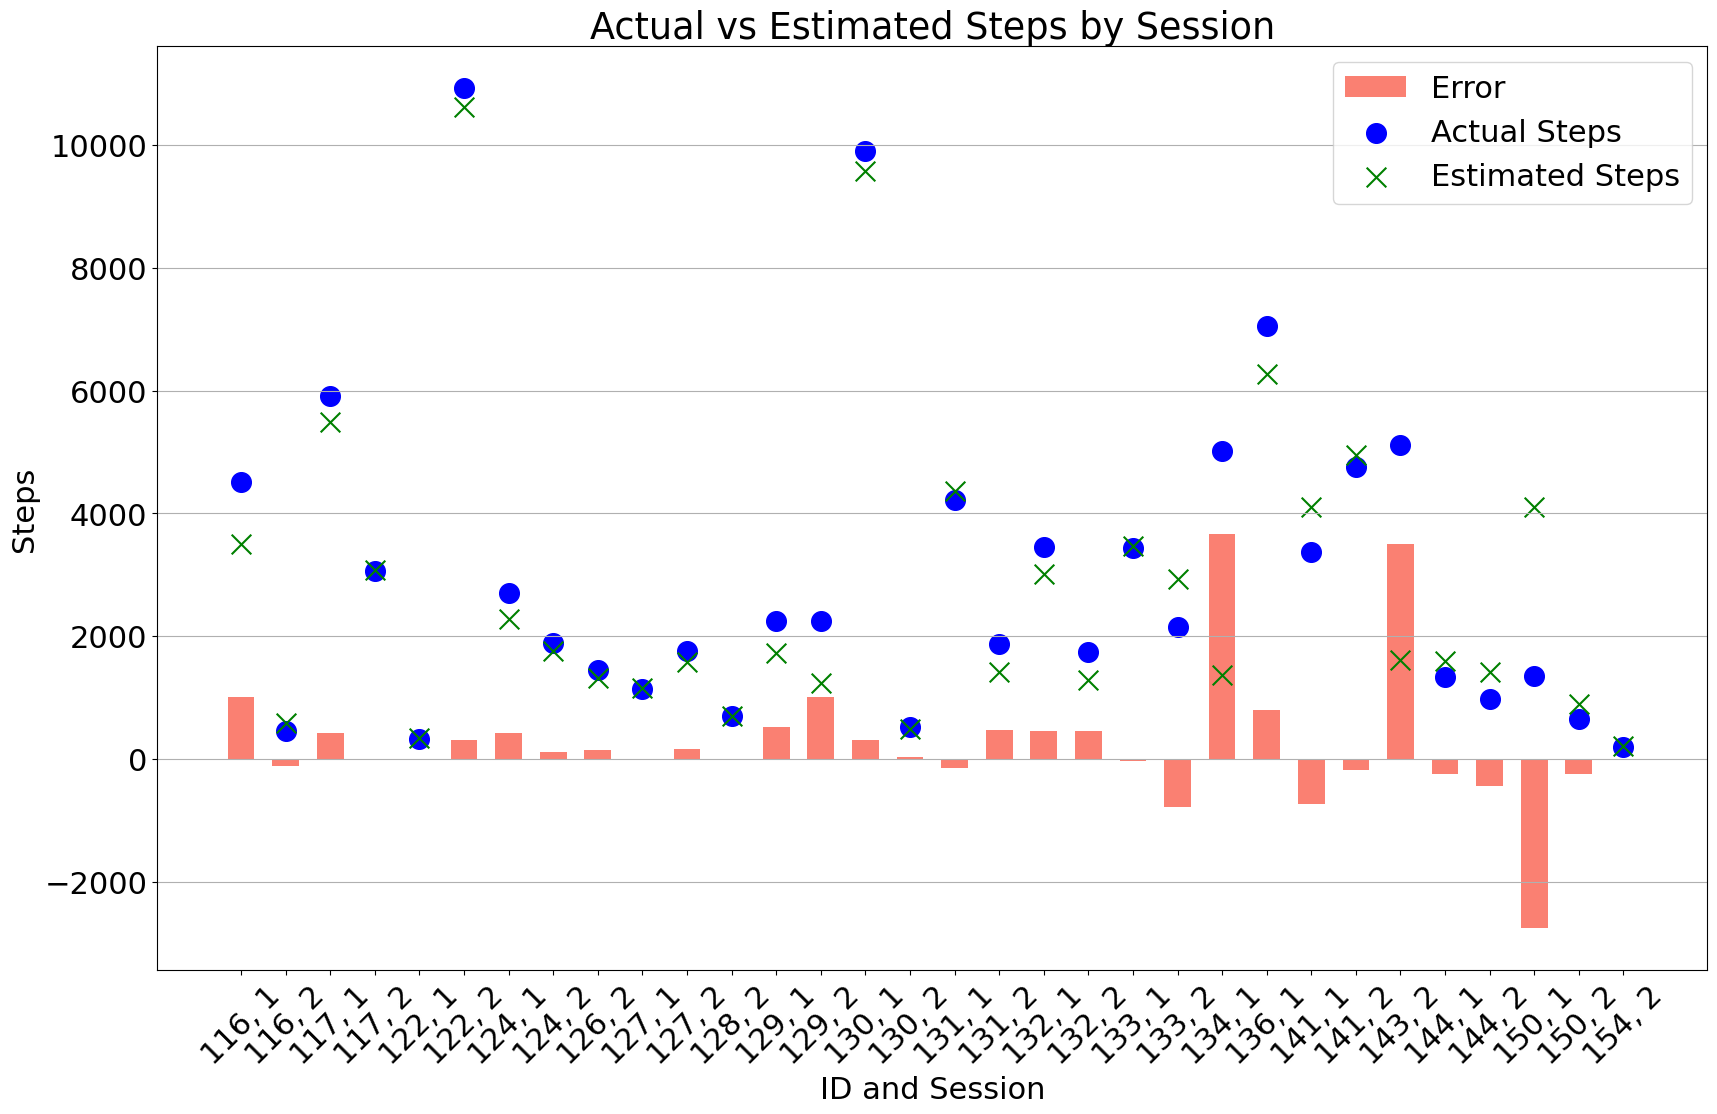

In [55]:
session_sum = merged_df.groupby('ID_Session').agg({'Actual': 'sum', 'Estimated': 'sum', 'Error': 'sum'})

plt.figure(figsize=(20,12))
plt.bar(session_sum.index, session_sum['Error'], color='salmon', width=0.6)
plt.scatter(session_sum.index, session_sum['Actual'], marker='o', color='blue', label='Actual Steps', s=200)
plt.scatter(session_sum.index, session_sum['Estimated'], marker='x', color='green', label='Estimated Steps', s=200)

plt.rcParams.update({'font.size': 22})
plt.title('Actual vs Estimated Steps by Session')
plt.xlabel('ID and Session')
plt.ylabel('Steps')
plt.legend(handles=[error_bars] + [h for h in plt.legend().legendHandles], 
           labels=['Error', 'Actual Steps', 'Estimated Steps'])
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.savefig('actual_est.png')
plt.show()


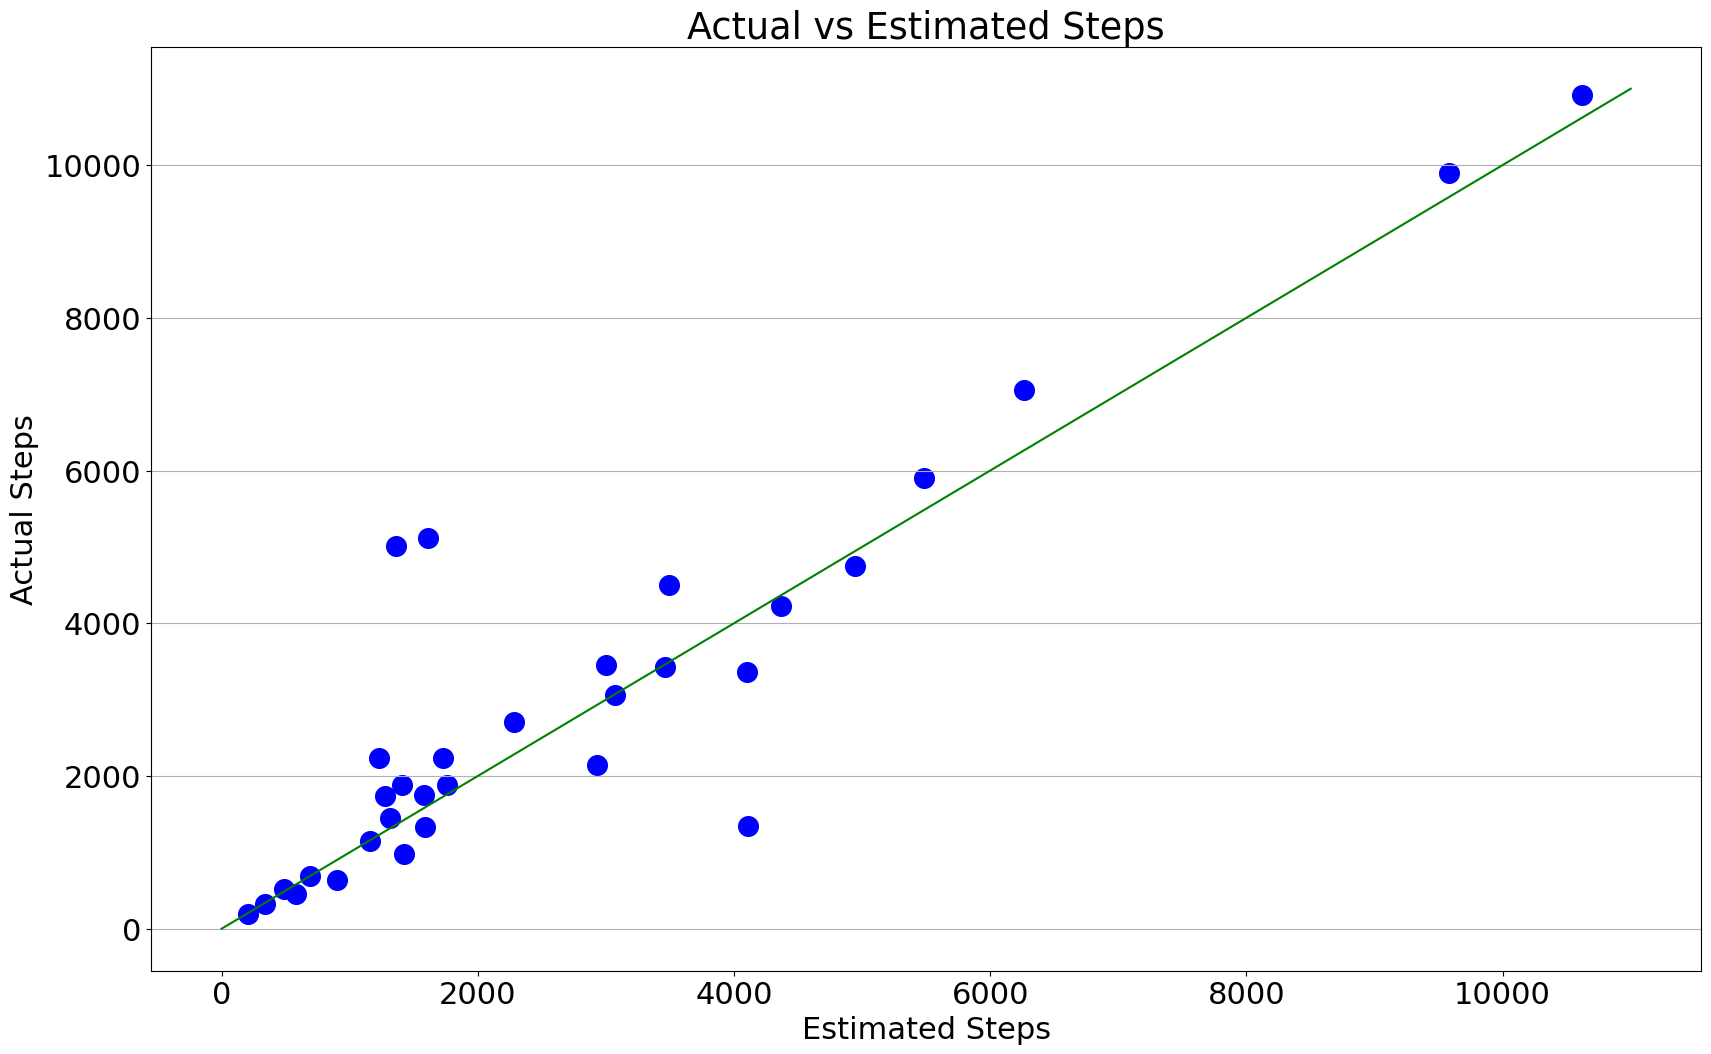

In [59]:
plt.figure(figsize=(20, 12))
plt.scatter(merged_df['Estimated'], merged_df['Actual'], color='blue', s=200)
plt.plot(np.linspace(0,11000), np.linspace(0,11000), color='green')

plt.title('Actual vs Estimated Steps')
plt.xlabel('Estimated Steps')
plt.ylabel('Actual Steps')
plt.grid(True, axis='y')
plt.savefig('actual_est2.png')
plt.show()